
<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 2 </H3>
<hr style="height:2px;border:none"/>



# Parte 1. **Pregunta de Investigación**


> **3. Regresión Polinomial:** Expandir un modelo de regresión lineal creando características polinomiales de alto orden reduce siempre el error de entrenamiento pero no necesariamente el error de predicción.

# Regresión Polinomial

RMSE 15.908242501429998
r2 0.6386750054827146


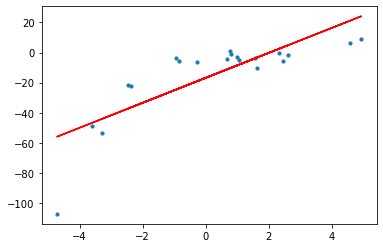

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)

print("RMSE", rmse)
print("r2", r2)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

El modelo anterior se puede modelar como:
$$
\boxed{y = \theta_0 + \theta_1x}
$$

Para poder aumentar la complejidad del modelo (y por ende, que se ajuste mejor a nuestros datos de entrenamiento), es posible transformar este modelo al siguiente:
$$
\boxed{y = \theta_0 + \theta_1x + \theta_2x^2}
$$

Y generalizando, es posible transformarse a:
$$
\boxed{y = \theta_0 + \theta_1x + \theta_2x^2 + \cdots + \theta_nx^{n} = \sum_{i=1}^n\theta_ix^i + \theta_0 } 
$$

RMSE 10.120437473614711
r2 0.8537647164420812


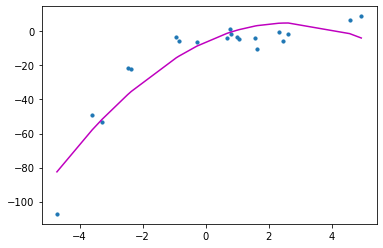

In [10]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE", rmse)
print("r2", r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png" alt="Alternative text" />

Fuente https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

# Dataset 1: Weather in Szeged 2006-2016
https://www.kaggle.com/datasets/budincsevity/szeged-weather

## EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings('ignore')

In [3]:
df_weather = pd.read_csv('pregunta 1/weatherHistory.csv')
df_weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
# arreglamos el formato de fecha 
df_weather['Formatted Date'] = pd.to_datetime(df_weather['Formatted Date'].apply(lambda x: x.split('+')[0]) )
df_weather = df_weather.set_index('Formatted Date')     
df_weather = df_weather.sort_index()
df_weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-01-01 00:00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
2006-01-01 01:00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2006-01-01 02:00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
2006-01-01 03:00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
2006-01-01 04:00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.
2016-12-31 20:00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.
2016-12-31 21:00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.


In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [6]:
df_weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [7]:
df_weather.dtypes.value_counts()

float64    8
object     3
dtype: int64

In [9]:
print(df_weather['Summary'].unique())
cant_summary = len(df_weather['Summary'].unique())
print(f'Hay {cant_summary} valores únicos del resumen del clima')

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy' 'Clear'
 'Breezy and Overcast' 'Breezy and Mostly Cloudy' 'Windy and Overcast'
 'Windy and Foggy' 'Breezy and Foggy' 'Breezy and Partly Cloudy'
 'Windy and Partly Cloudy' 'Humid and Mostly Cloudy'
 'Humid and Partly Cloudy' 'Breezy' 'Windy and Mostly Cloudy'
 'Dangerously Windy and Partly Cloudy' 'Dry and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Breezy and Dry' 'Dry and Mostly Cloudy'
 'Light Rain' 'Drizzle' 'Windy and Dry' 'Rain']
Hay 27 valores únicos del resumen del clima


In [10]:
df_weather['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [11]:
df_weather['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [12]:
df_weather['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

La columna "Loud Cover" solo contiene ceros, por lo que la eliminaremos al no entregar información diferenciadora. También, eliminaremos la columna "Daily Summary", ya que contiene información del día en general, y queremos predecir para cada fecha y hora

In [13]:
df_weather = df_weather.drop('Loud Cover', axis=1)
df_weather = df_weather.drop('Daily Summary', axis=1)
df_weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,,,
2006-01-01 00:00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66
2006-01-01 01:00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15
2006-01-01 02:00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87
2006-01-01 03:00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56
2006-01-01 04:00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98
...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03
2016-12-31 20:00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27
2016-12-31 21:00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50


Realizaremos un pairplot de las columnas cuantitativas para ver como se comportan entre ellas

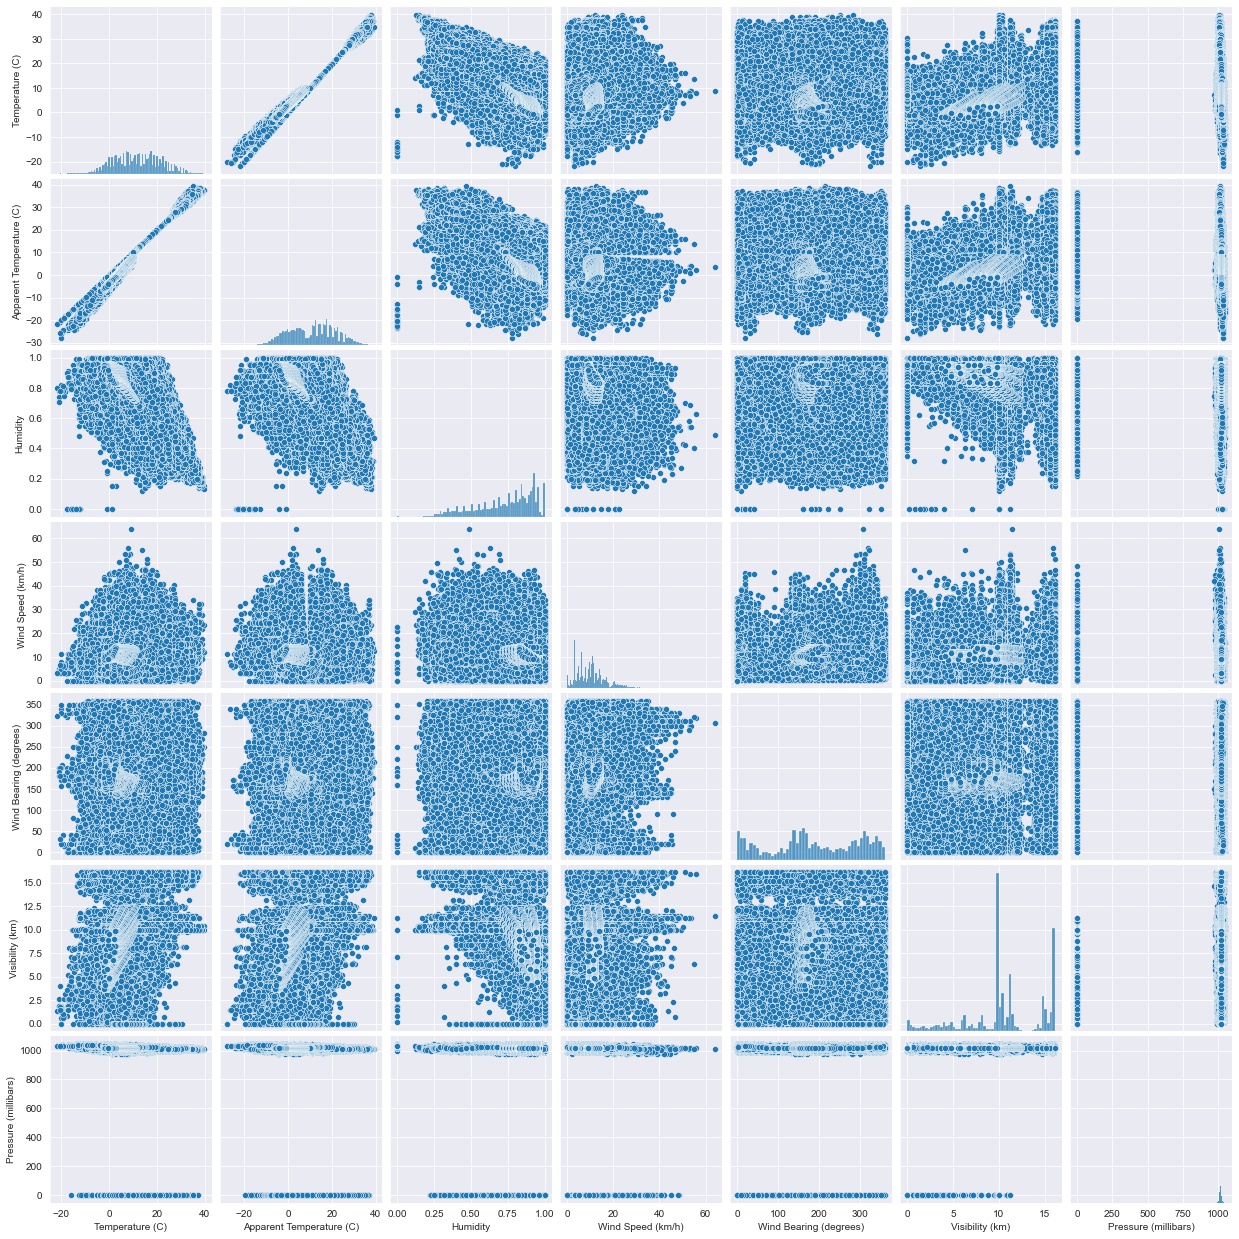

In [14]:
quantitative_columns = ['Temperature (C)', 'Apparent Temperature (C)', 
                        'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                       'Visibility (km)', 'Pressure (millibars)']
sns.pairplot(df_weather[quantitative_columns])

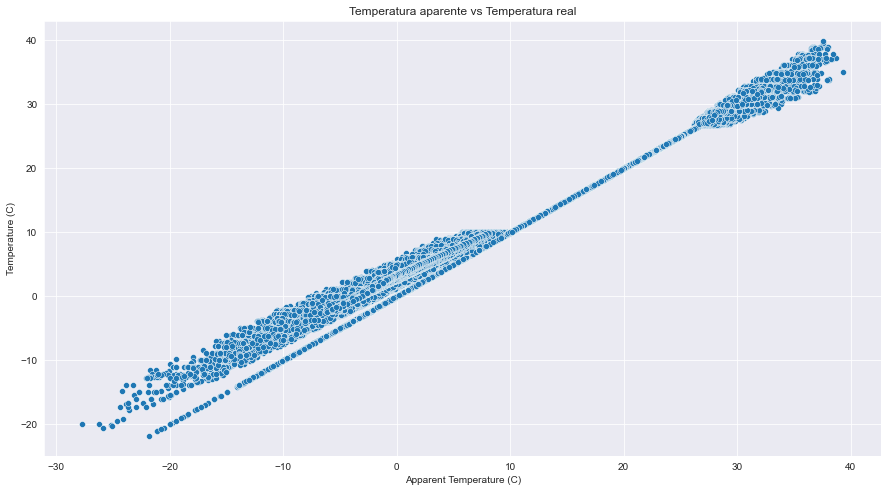

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Apparent Temperature (C)', y='Temperature (C)', data=df_weather)
plt.title('Temperatura aparente vs Temperatura real')
plt.show()

La temperatura aparante viene dada por la temperatura real (mantienen una relación bastante lineal), por lo que se sacará del dataset, ya que predeciremos la temperatura real

In [18]:
df_weather = df_weather.drop('Apparent Temperature (C)', axis=1)

## Preprocesamiento
* Borramos los datos nulos
* Para las variables categóricas __Summary y Precip Type__ usaremos dummy encode para transformarlas a columnas numéricas
* Para las demás variables, se normalizarán los datos antes de pasarlos al modelo de regresión

In [19]:
# obtenemos los dummies de las columnas categóricas
df_weather_dummy = pd.get_dummies(df_weather, prefix={'Summary':'Summary', 
                                      'Precip Type':'Precip Type'},
                          drop_first=True)

In [20]:
df_weather_dummy

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,...,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
Formatted Date,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,0.577778,0.89,17.1143,140.0,9.9820,1016.66,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2006-01-01 01:00:00,1.161111,0.85,16.6152,139.0,9.9015,1016.15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-01-01 02:00:00,1.666667,0.82,20.2538,140.0,9.9015,1015.87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-01-01 03:00:00,1.711111,0.82,14.4900,140.0,9.9015,1015.56,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2006-01-01 04:00:00,1.183333,0.86,13.9426,134.0,9.9015,1014.98,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,0.488889,0.86,9.7566,167.0,8.0178,1020.03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-31 20:00:00,0.072222,0.88,9.4185,169.0,7.2450,1020.27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-31 21:00:00,-0.233333,0.89,9.2736,175.0,9.5795,1020.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# quitamos columna target del dataset completo y la dejamos aparte
y = df_weather_dummy['Temperature (C)']
X = df_weather_dummy.drop('Temperature (C)', axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

def process_dataset(X, y, poly=False, alpha=1):
    # columnas numéricas
    numerical_columns = [ 'Wind Speed (km/h)', 
                             'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
    # si poly es true, aplica Polynomial features
    if poly == True: 
        polynomial_features = PolynomialFeatures(degree=alpha, include_bias=False) # alpha es grado del polinomio
        
        # columnas restantes
        columns_left = list(set(X.columns) - set(numerical_columns))

        X_poly_numerical_features = polynomial_features.fit_transform(X[numerical_columns]) # fit transform

        # nombre de las columnas polinomiales    
        cont_predictors_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(numerical_columns,p) for p in polynomial_features.powers_]]

        X_poly_numerical_features = pd.DataFrame(X_poly_numerical_features, 
                                          columns=cont_predictors_names, index=list(X.index))
        X = pd.concat([X_poly_numerical_features, X[columns_left]], axis=1).reindex(X.index)

        # separamos datasets en train, validación y test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

        # escalamiento normalizacion N(0,1)
        scaler = StandardScaler()
        X_train[cont_predictors_names] = scaler.fit_transform(X_train[cont_predictors_names]) # fit transform
        X_val[cont_predictors_names] = scaler.transform(X_val[cont_predictors_names]) # solo transform
        X_test[cont_predictors_names] = scaler.transform(X_test[cont_predictors_names]) # solo transform

    
    else:
        # separamos datasets en train, validación y test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
        
        # escalamiento normalizacion N(0,1)
        scaler = StandardScaler()
        X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns]) # fit transform
        X_val[numerical_columns] = scaler.transform(X_val[numerical_columns]) # solo transform
        X_test[numerical_columns] = scaler.transform(X_test[numerical_columns]) # solo transform
        
    # chequeo dimensiones
    print("X,y Shapes:", X.shape, y.shape)
    print("X,y Train Shapes:", X_train.shape, y_train.shape)
    print("X,y Val Shapes:", X_val.shape, y_val.shape)
    print("X,y Test Shapes:", X_test.shape, y_test.shape)
    
    return X_train, y_train, X_val, y_val, X_test, y_test


## Modelamiento

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

def linear_regression(X_train, y_train, X_val, y_val, X_test, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # predicciones para train
    y_train_pred = lr.predict(X_train)
    
    # scores train
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    
    print(f' R^2 train score: {r2_train}')
    print(f' RMSE train score: {rmse_train}')
    print("")

    # predicciones para validacion
    y_val_pred = lr.predict(X_val)
    
    # scores validación
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))
    
    print(f' R^2 validación score: {r2_val}')
    print(f' RMSE validación score: {rmse_val}')
    print("")

    # predicciones para test
    y_test_pred = lr.predict(X_test)
    
    # scores test
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    print(f' R^2 test score: {r2_test}')
    print(f' RMSE test score: {rmse_test}')
    print("")
    
    return [(r2_train, rmse_train), (r2_val, rmse_val), (r2_test, rmse_test)]

In [45]:
X_train, y_train, X_val, y_val, X_test, y_test = process_dataset(X,y)
linear_regression(X_train, y_train, X_val, y_val, X_test, y_test)

 R^2 train score: 0.6134038192329414
 RMSE train score: 5.931193357387835

 R^2 validación score: 0.6160101837976303
 RMSE validación score: 5.939376687211858

 R^2 test score: 0.6133462711752855
 RMSE test score: 5.947008890494479



In [73]:
# probaremos con polinomios de gra
# probando con numeros del 1 al 10
alphas = list(np.arange(1, 10 + 1, 1, dtype=int))
print(alphas)


scores_r2 = []
scores_rmse = []

for alpha in alphas:
    print(f"alpha = {alpha}")
    X_train, y_train, X_val, y_val, X_test, y_test = process_dataset(X,y, poly=True, alpha=alpha)
    s_train, s_valid, s_test = linear_regression(X_train, y_train, X_val, y_val, X_test, y_test)
    
    scores_r2.append((s_train[0], s_valid[0], s_test[0]))
    scores_rmse.append((s_train[1], s_valid[1], s_test[1]))
    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
alpha = 1
X,y Shapes: (96453, 32) (96453,)
X,y Train Shapes: (61729, 32) (61729,)
X,y Val Shapes: (15433, 32) (15433,)
X,y Test Shapes: (19291, 32) (19291,)
 R^2 train score: 0.6134038192329414
 RMSE train score: 5.931193357387835

 R^2 validación score: 0.6160101837976303
 RMSE validación score: 5.939376687211858

 R^2 test score: 0.6133462711752857
 RMSE test score: 5.947008890494477

alpha = 2
X,y Shapes: (96453, 42) (96453,)
X,y Train Shapes: (61729, 42) (61729,)
X,y Val Shapes: (15433, 42) (15433,)
X,y Test Shapes: (19291, 42) (19291,)
 R^2 train score: 0.6598092021394455
 RMSE train score: 5.563839373846463

 R^2 validación score: 0.660204369512654
 RMSE validación score: 5.587144602680045

 R^2 test score: 0.6601697198808899
 RMSE test score: 5.575303618828569

alpha = 3
X,y Shapes: (96453, 62) (96453,)
X,y Train Shapes: (61729, 62) (61729,)
X,y Val Shapes: (15433, 62) (15433,)
X,y Test Shapes: (19291, 62) (19291,)
 R^2 train score: 0.678081256350

In [75]:
print(scores_r2)

[(0.6134038192329414, 0.6160101837976303, 0.6133462711752857), (0.6598092021394455, 0.660204369512654, 0.6601697198808899), (0.67808125635035, 0.6792895196255839, 0.6801625673120124), (0.6884320428345507, 0.6911730523072559, 0.6903075404181789), (0.6951905167757271, 0.696721418422874, 0.6974899607353819), (0.6986620746322904, 0.6993315455931584, 0.7008745879812625), (0.7021034109448574, 0.7015924873264523, 0.7031786742538071), (0.7050562212699534, 0.6882904783698732, 0.7004994987935023), (0.7067516136279881, 0.6494414941688562, 0.7023843157959432), (0.7091870534553706, 0.27486560626414214, 0.6223523255707407)]


In [87]:
def plot_scores(scores, score_type):
    scores_df = pd.DataFrame(alphas)
        
    if score_type == 'r2':
        scores_df['s_r2_train'] = [s[0] for s in scores]
        scores_df['s_r2_val'] = [s[1] for s in scores]
        scores_df['s_r2_test'] = [s[2] for s in scores]
        
    if score_type == 'rmse':
        scores_df['s_rmse_train'] = [s[0] for s in scores]
        scores_df['s_rmse_val'] = [s[1] for s in scores]
        scores_df['s_rmse_test'] = [s[2] for s in scores]   


    scores_df.rename(columns = {0:'alpha'}, inplace = True)
    scores_df = scores_df.set_index('alpha')

    display(scores_df)

    # plot using lineplot
    sns.set(style='darkgrid')
    sns.set(rc={'figure.figsize':(15,5)})
    plt.ylabel(f"{score_type} scores")
    plt.title(f'{score_type.capitalize()} score variation of polynomial features')
    sns.lineplot(data=scores_df)
    plt.show()

,s_r2_train,s_r2_val,s_r2_test
alpha,,,
1,0.613404,0.616010,0.613346
2,0.659809,0.660204,0.660170
3,0.678081,0.679290,0.680163
4,0.688432,0.691173,0.690308
5,0.695191,0.696721,0.697490
6,0.698662,0.699332,0.700875
7,0.702103,0.701592,0.703179
8,0.705056,0.688290,0.700499
9,0.706752,0.649441,0.702384


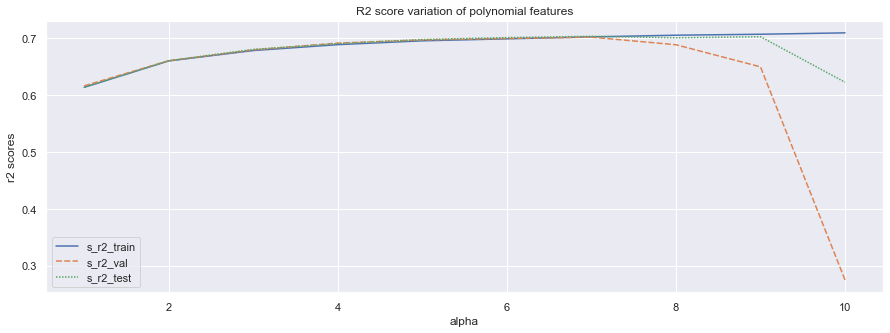

In [88]:
plot_scores(scores_r2, 'r2')

,s_rmse_train,s_rmse_val,s_rmse_test
alpha,,,
1,5.931193,5.939377,5.947009
2,5.563839,5.587145,5.575304
3,5.412357,5.427972,5.408815
4,5.324633,5.326459,5.322342
5,5.266566,5.278395,5.260262
6,5.236489,5.255632,5.230752
7,5.206502,5.235834,5.210568
8,5.180634,5.351260,5.234031
9,5.165723,5.674940,5.217535


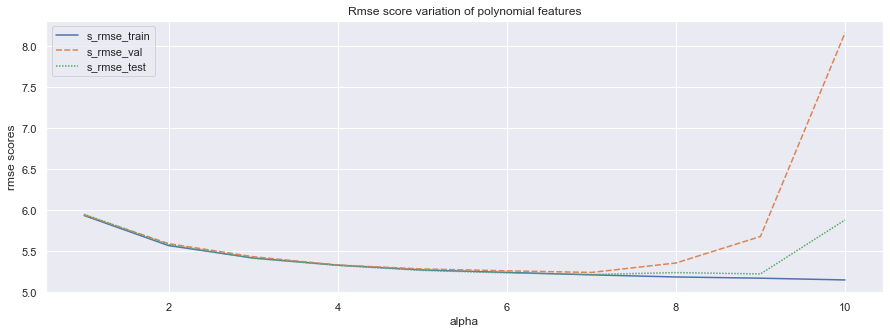

In [89]:
plot_scores(scores_rmse, 'rmse')